In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Check for class imbalance
attrition_counts = data['Attrition'].value_counts()
attrition_counts

No     1233
Yes     237
Name: Attrition, dtype: int64

### From the above cell it is pretty clear that there is class imbalance with respect to the Attrition column.

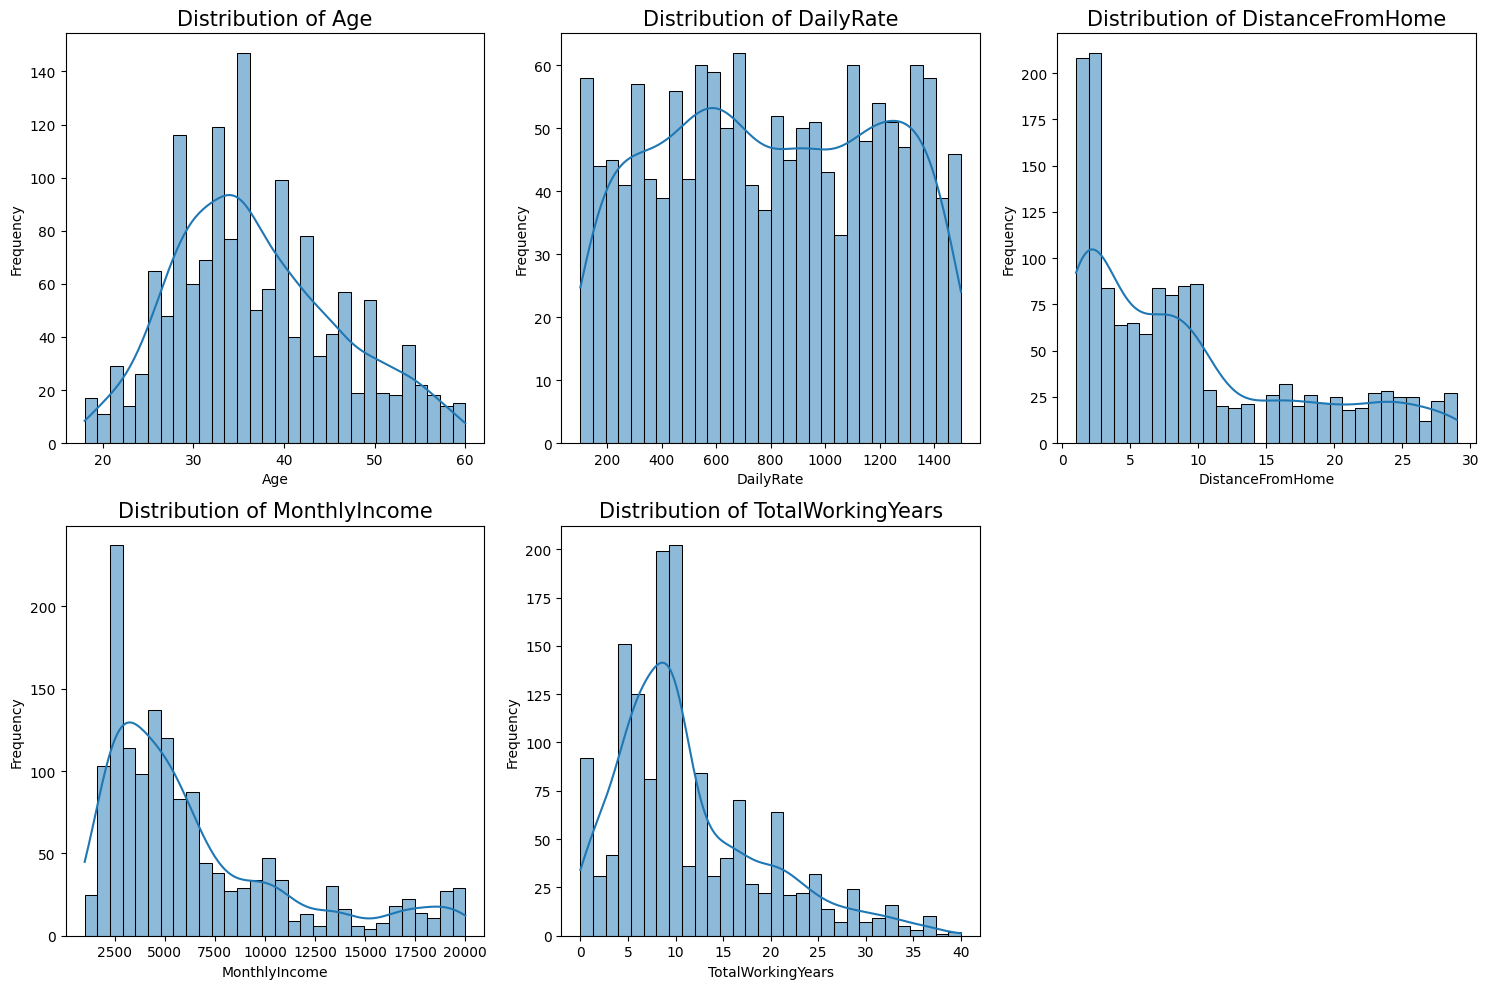

In [ ]:
# Plot distribution for the following columns
columns_to_plot = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. #### Age: The age distribution is somewhat right-skewed, with a larger number of younger employees in the dataset.

2. #### DailyRate: The distribution for the daily rate seems relatively uniform, with no specific pattern or prominent peaks.

3. #### DistanceFromHome: The distribution is right-skewed, indicating that many employees live closer to their workplace.

4. #### MonthlyIncome: The monthly income distribution is right-skewed, showing that a significant number of employees earn a lower monthly income, with fewer employees in the higher income brackets.

5. #### TotalWorkingYears: This distribution is also right-skewed, suggesting that many employees have fewer total working years, which aligns with the younger age distribution.

<ipython-input-7-fb749574470b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


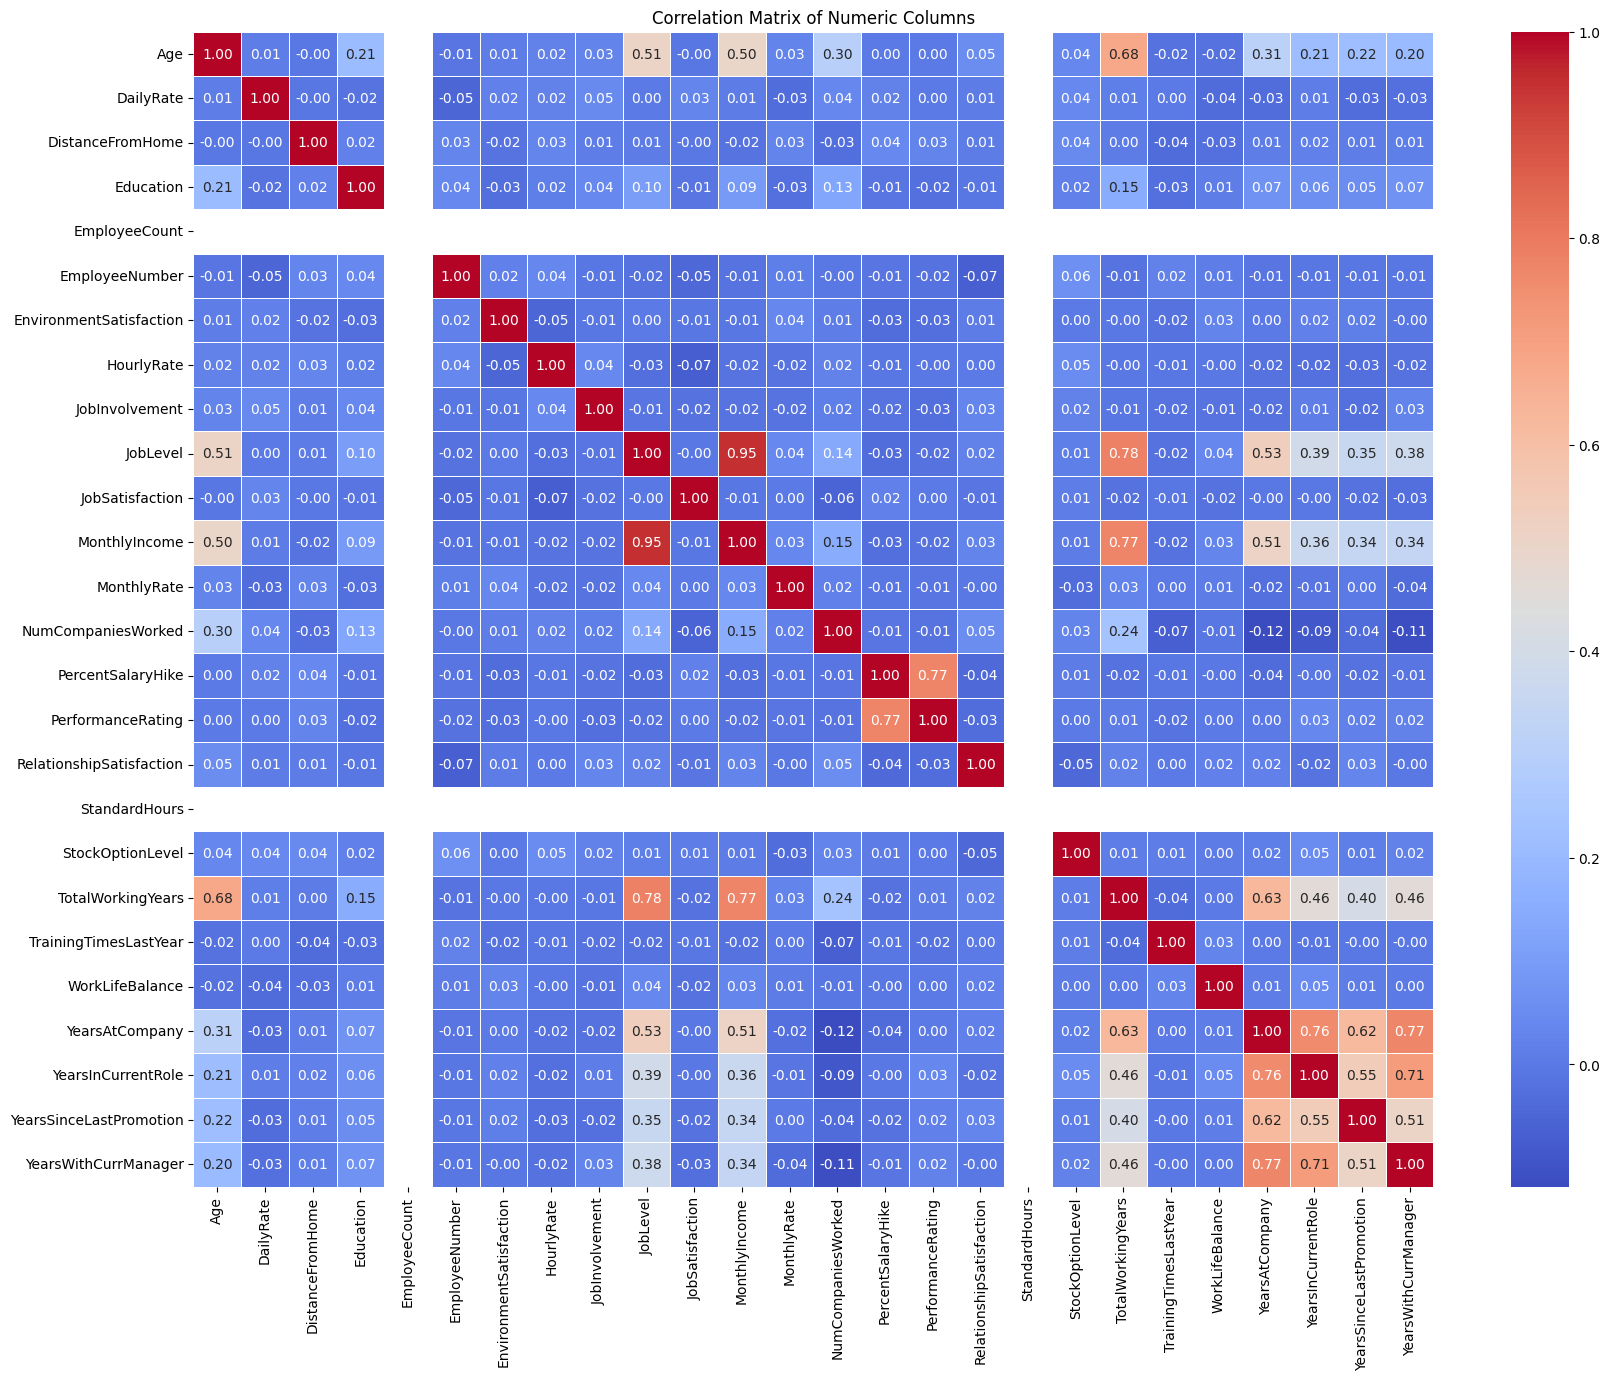

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

1. #### TotalWorkingYears has a strong positive correlation with Age (0.68), which is expected. As employees get older, they accumulate more working years.

2. #### MonthlyIncome is positively correlated with JobLevel (0.95). This suggests that as employees move up in job levels, their monthly income generally increases.

3. #### YearsAtCompany has a positive correlation with YearsWithCurrManager (0.77) and YearsInCurrentRole (0.76). This indicates that employees who've been at the company longer tend to have been in their current role longer and with the same manager for a longer time.

In [ ]:
from scipy.stats import chi2_contingency

pairs = [
    ('Attrition', 'BusinessTravel'),
    ('Attrition', 'Department'),
    ('Attrition', 'EducationField'),
    ('Attrition', 'JobRole')
]

chi2_results = {}

# Compute the Chi-square statistic and p-value for categorical pairs
for pair in pairs:
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[pair] = (chi2, p)

chi2_results_df = pd.DataFrame(chi2_results, index=['Chi2 Statistic', 'p-value']).T
chi2_results_df

Chi2 Statistic       p-value
Attrition BusinessTravel       24.182414  5.608614e-06
          Department           10.796007  4.525607e-03
          EducationField       16.024674  6.773980e-03
          JobRole              86.190254  2.752482e-15

* All the pairs show a p-value less than 0.05, indicating that there's a significant association between the variables in each pair.


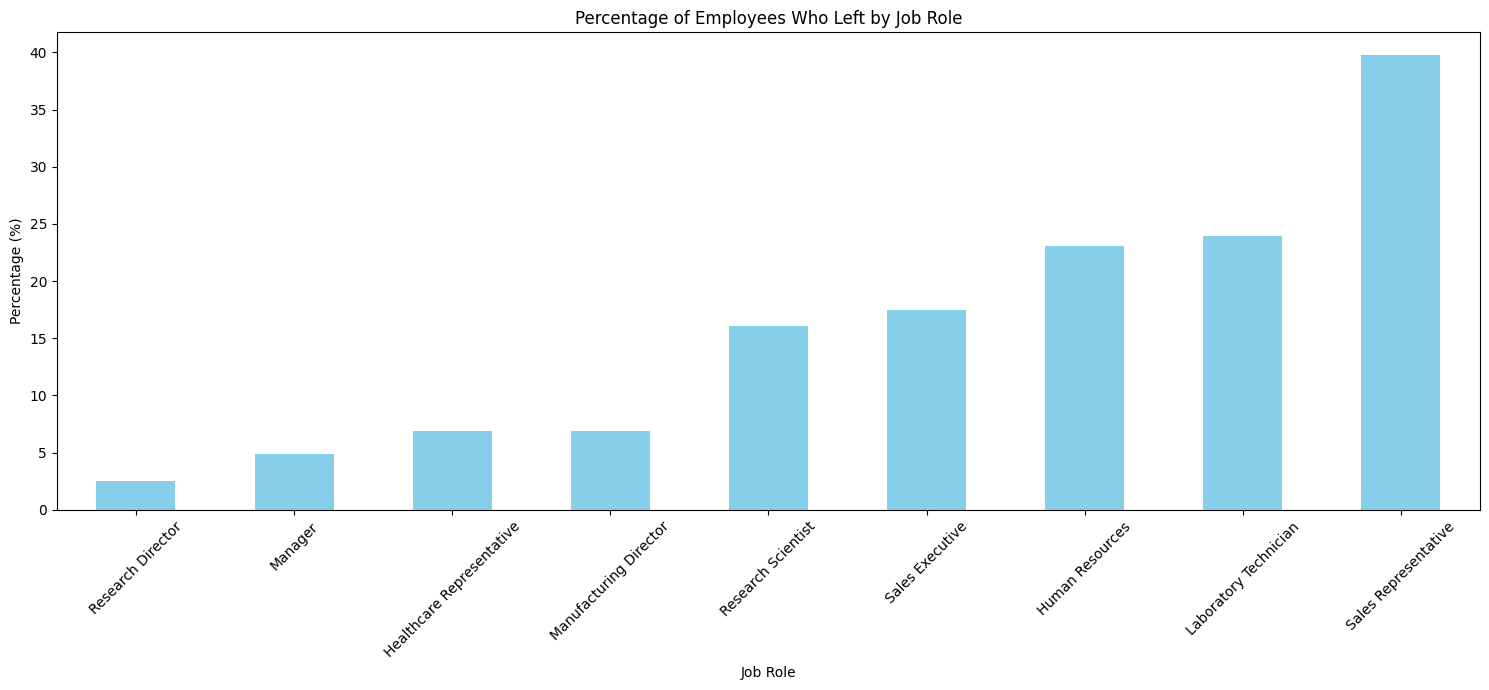

In [ ]:
# Calculate the relative percentages of attrition for each job role
attrition_percentages = data.groupby('JobRole')['Attrition'].value_counts(normalize=True).mul(100).unstack().fillna(0)

# Plot the relative percentages
plt.figure(figsize=(15, 7))
attrition_percentages['Yes'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Percentage of Employees Who Left by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## This gives an overview of job roles with higher attrition risks
1. #### Sales Representative has the highest percentage of attrition, with over 40% of employees in this role leaving the company.

2. #### Roles like Research Director, Manager, and Healthcare Representative have relatively low percentages of attrition, all below 10%.

3. #### Other roles such as Laboratory Technician, Human Resources, and Sales Executive also have notable percentages of attrition.

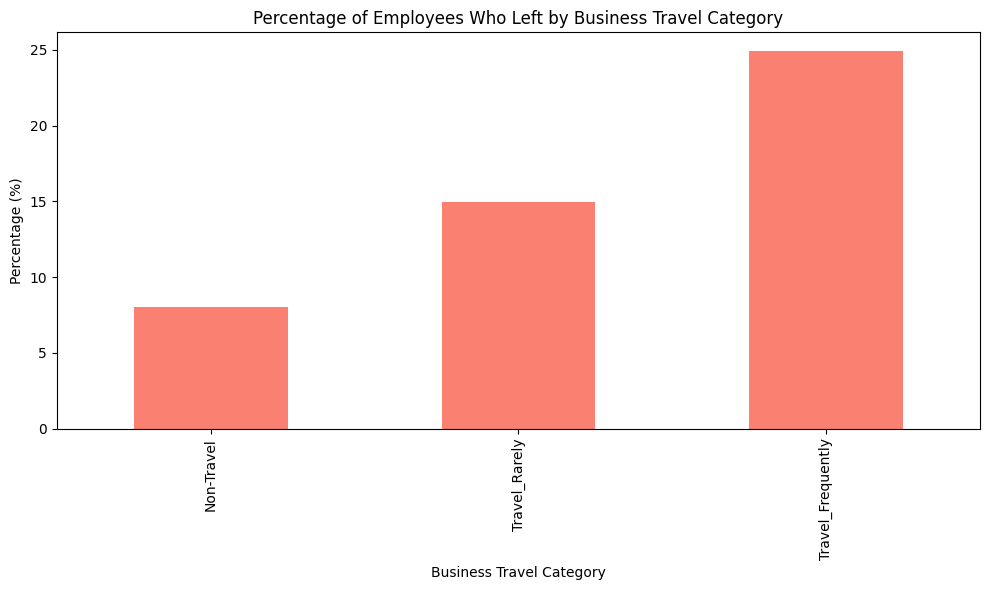

In [ ]:
# Calculate the relative percentages of attrition for each business travel category
travel_attrition_percentages = data.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).mul(100).unstack().fillna(0)

# Plot the relative percentages
plt.figure(figsize=(10, 6))
travel_attrition_percentages['Yes'].sort_values().plot(kind='bar', color='salmon')
plt.title('Percentage of Employees Who Left by Business Travel Category')
plt.xlabel('Business Travel Category')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

1. #### Employees who travel frequently have the highest percentage of attrition, nearing 25%. This suggests that frequent business travel might be a significant factor influencing employees' decisions to leave the company.
2. #### The attrition percentage for employees who travel rarely is lower.
3. #### The Non-Travel category has the lowest percentage of attrition.

These insights indicate that the nature and frequency of business travel could be a potential area of concern when addressing employee attrition. Frequent business travel might lead to burnout, work-life imbalance, or other factors that contribute to higher attrition rates.

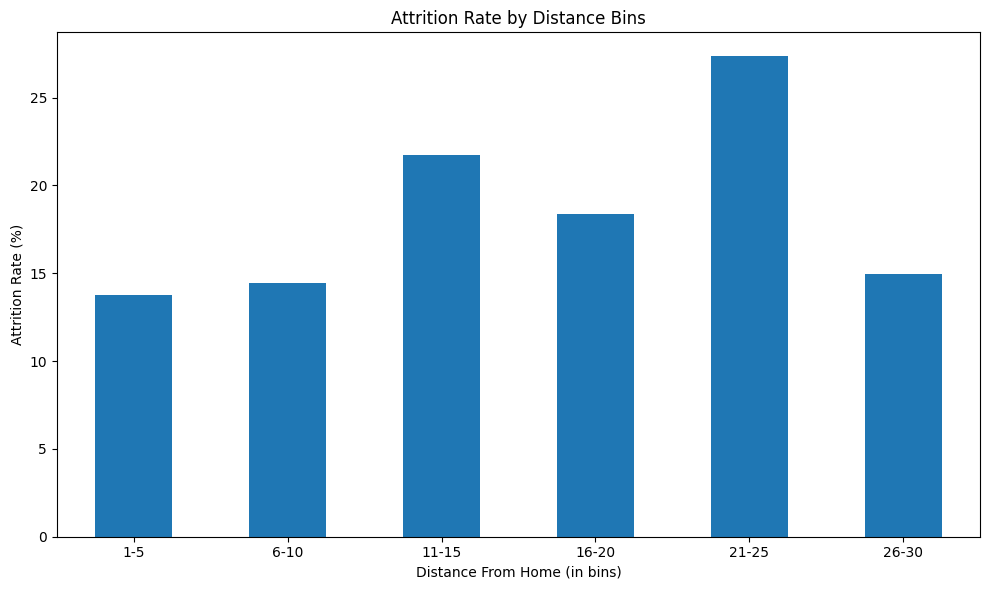

In [ ]:
# Group DistanceFromHome into bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
data['DistanceBin'] = pd.cut(data['DistanceFromHome'], bins=bins, labels=labels, right=True)

# Calculate the attrition rate for each bin
attrition_rate_by_distance = data.groupby('DistanceBin')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)

# Plot the attrition rate by distance bins
plt.figure(figsize=(10, 6))
attrition_rate_by_distance.plot(kind='bar')
plt.title('Attrition Rate by Distance Bins')
plt.xlabel('Distance From Home (in bins)')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. #### The attrition rate is relatively lower for employees who live within 1-5 units from work.
2. #### There's a noticeable increase in the attrition rate as the distance increases.
3. #### However, the attrition rate does seem to fluctuate, with a peak in the 21-25 units bin and a decline in the 26-30 units bin.

#### These patterns suggest that distance from work may play a role in an employee's decision to leave the company, especially for those living at intermediate distances.

In [ ]:
# Average MonthlyIncome by Attrition for each JobRole
average_income_by_role = data.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].mean().unstack().sort_values(by='Yes', ascending=False)
average_income_by_role

Attrition,No,Yes
JobRole,,
Research Director,15947.346154,19395.500000
Manager,17201.484536,16797.400000
Healthcare Representative,7453.557377,8548.222222
Sales Executive,6804.617100,7489.000000
Manufacturing Director,7289.925926,7365.500000
Human Resources,4391.750000,3715.750000
Laboratory Technician,3337.223350,2919.258065
Research Scientist,3328.122449,2780.468085
Sales Representative,2798.440000,2364.727273


1. #### For roles like Research Director and Healthcare Representative, employees who left had a slightly higher average monthly income than those who stayed.
2. #### Conversely, for roles like Manager and Human Resources, employees who left had a lower average monthly income compared to those who stayed.

#### There isn't a clear pattern here which maybe indicative that other factors also influence an employee's decision to leave and not just their income.

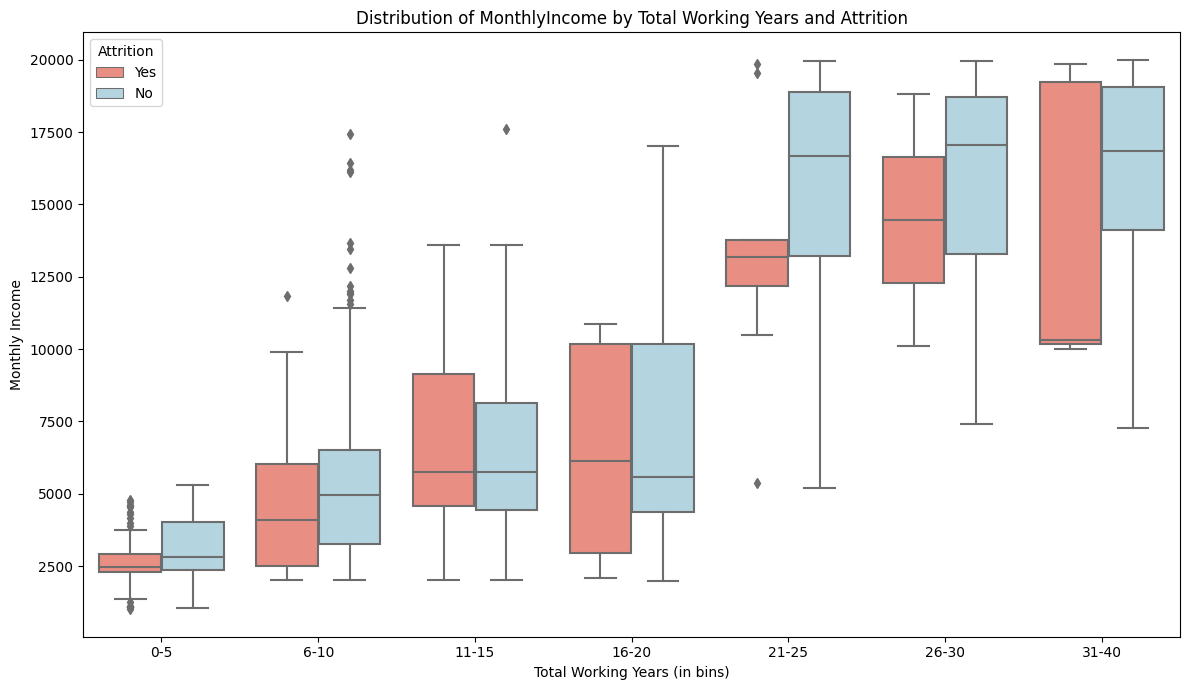

In [ ]:
# Discretize TotalWorkingYears into ranges/bins
bins_years = [0, 5, 10, 15, 20, 25, 30, 40]
labels_years = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40']
data['WorkingYearsBin'] = pd.cut(data['TotalWorkingYears'], bins=bins_years, labels=labels_years, right=True)

# Distribution of MonthlyIncome by TotalWorkingYears bins for employees who left vs. those who stayed
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='WorkingYearsBin', y='MonthlyIncome', hue='Attrition', palette={'Yes': 'salmon', 'No': 'lightblue'})
plt.title('Distribution of MonthlyIncome by Total Working Years and Attrition')
plt.xlabel('Total Working Years (in bins)')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


1. #### As expected, the median monthly income generally increases with more working years, reflecting career progression and raises over time.
2. #### In the early stages of their careers (0-5 years and 6-10 years), employees who left had a noticeably lower median monthly income than those who stayed.
3. #### In the mid-career stages (11-15 and 16-20 years), the difference in median monthly income between those who left and those who stayed is minimal or inversed.
4. #### For more experienced employees (20+ years), the difference in average monthly income between the groups seems to widen again, with those who stayed generally earning more.

#### The findings suggest that income disparity might influence attrition more significantly at the beginning and later stages of an employee's career.

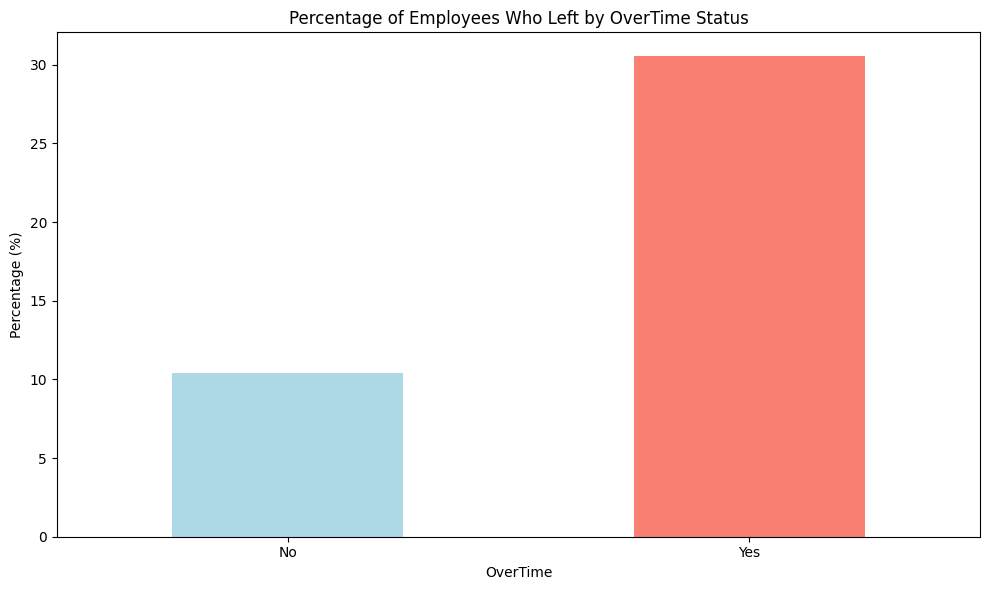

In [ ]:
# Calculate the relative percentages of attrition based on overtime status
overtime_attrition_percentages = data.groupby('OverTime')['Attrition'].value_counts(normalize=True).mul(100).unstack().fillna(0)

# Plot the relative percentages
plt.figure(figsize=(10, 6))
overtime_attrition_percentages['Yes'].plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Percentage of Employees Who Left by OverTime Status')
plt.xlabel('OverTime')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. #### Nearly 31% of employees who worked overtime left the company.
2. #### In contrast, only about 10% of employees who didn't work overtime left the company.

#### The significant difference in attrition rates between these two groups suggests that working overtime could be a substantial factor influencing attrition.

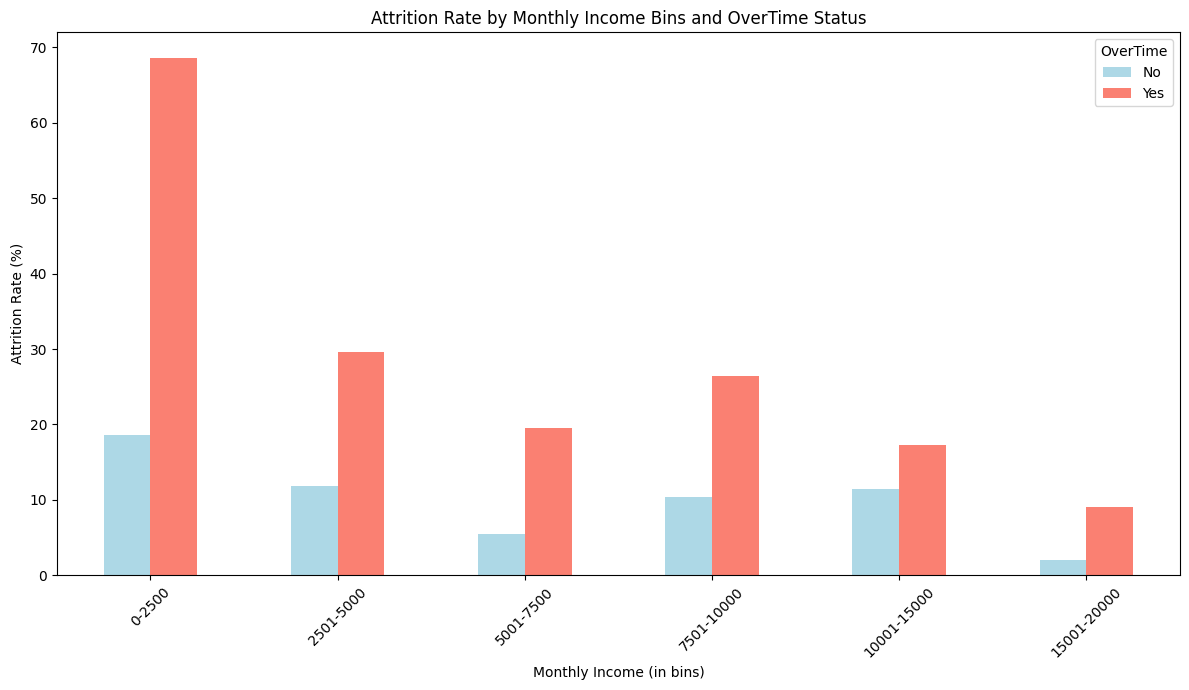

In [ ]:
# Group MonthlyIncome into bins
bins_income = [0, 2500, 5000, 7500, 10000, 15000, 20000]
labels_income = ['0-2500', '2501-5000', '5001-7500', '7501-10000', '10001-15000', '15001-20000']
data['IncomeBin'] = pd.cut(data['MonthlyIncome'], bins=bins_income, labels=labels_income, right=True)

# Calculate the attrition rate for each income bin and overtime status
attrition_rate_by_income_overtime = data.groupby(['IncomeBin', 'OverTime'])['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).unstack()

# Plot the attrition rate by income bins for both overtime categories
plt.figure(figsize=(12, 7))
attrition_rate_by_income_overtime.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'salmon'])
plt.title('Attrition Rate by Monthly Income Bins and OverTime Status')
plt.xlabel('Monthly Income (in bins)')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. #### Employees with lower incomes who worked overtime have a markedly higher attrition rate compared to those who didn't work overtime.
2. #### As income increases, the difference in attrition rates between the overtime categories narrows, but it's still higher for those working overtime.
3. #### For higher income ranges, the attrition rate is relatively low, even for those working overtime.

#### The pattern suggests that employees with lower incomes who also work overtime are particularly at high risk of leaving the company.

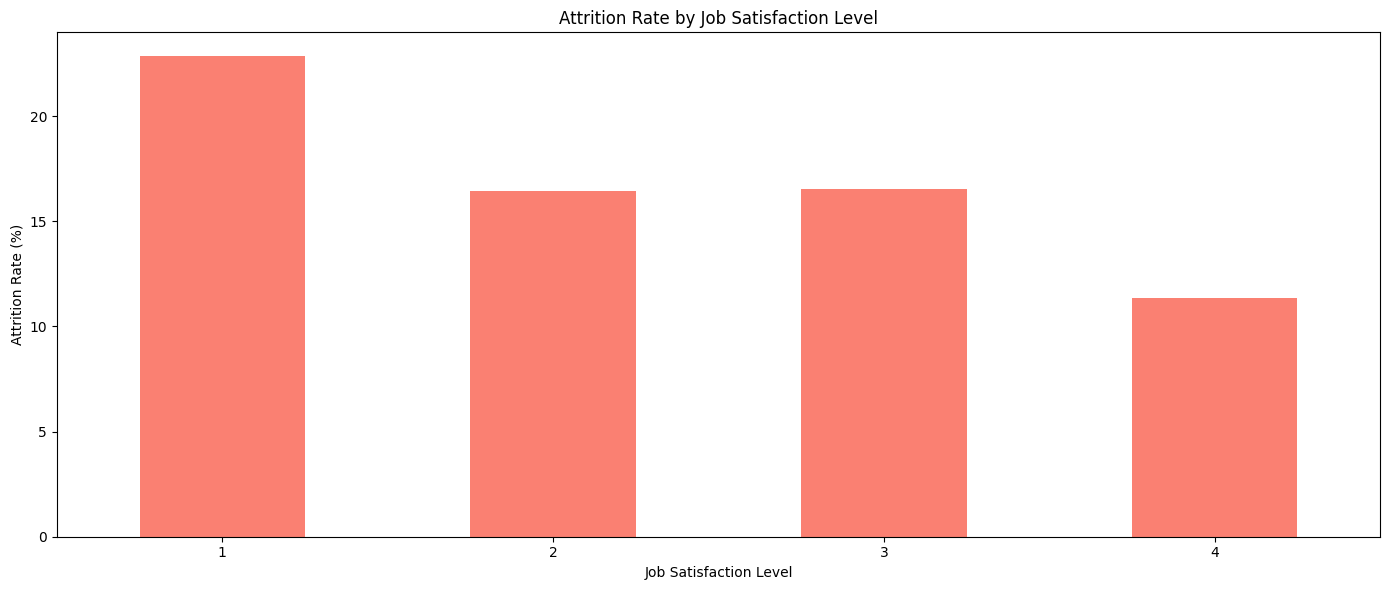

In [ ]:
# Visualization for JobSatisfaction and Attrition

# Distribution
plt.figure(figsize=(14, 6))

# Attrition Rate
job_satisfaction_attrition_rate = data.groupby('JobSatisfaction')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
job_satisfaction_attrition_rate.plot(kind='bar', color='salmon')
plt.title('Attrition Rate by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

1. #### This plot displays the percentage of employees who left for each level of job satisfaction.
2. #### The attrition rate is notably higher for employees with the lowest job satisfaction (level 1), gradually decreasing as satisfaction levels increase.

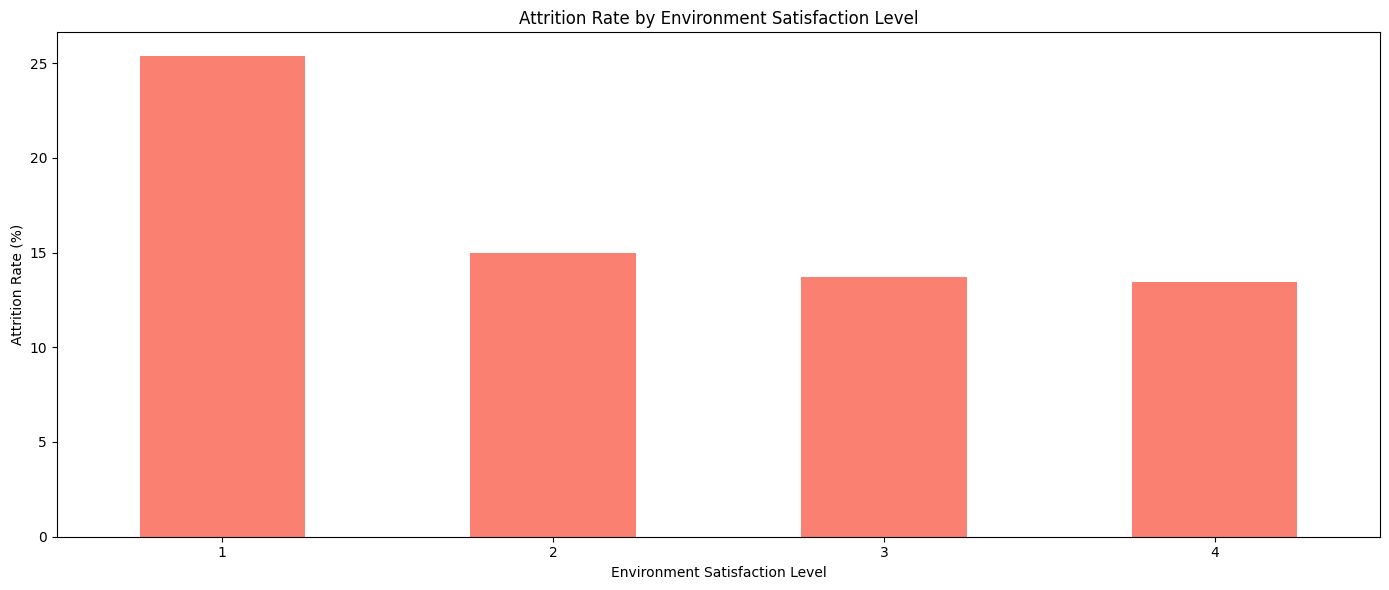

In [ ]:
# Visualization for EnvironmentSatisfaction and Attrition

# Distribution
plt.figure(figsize=(14, 6))
# Attrition Rate
environment_satisfaction_attrition_rate = data.groupby('EnvironmentSatisfaction')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
environment_satisfaction_attrition_rate.plot(kind='bar', color='salmon')
plt.title('Attrition Rate by Environment Satisfaction Level')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


1. #### The attrition rate is distinctly higher for employees with the lowest environment satisfaction. As satisfaction levels increase, the attrition rate decreases.
2. #### The data suggests that environment satisfaction plays a crucial role in an employee's decision to stay or leave.

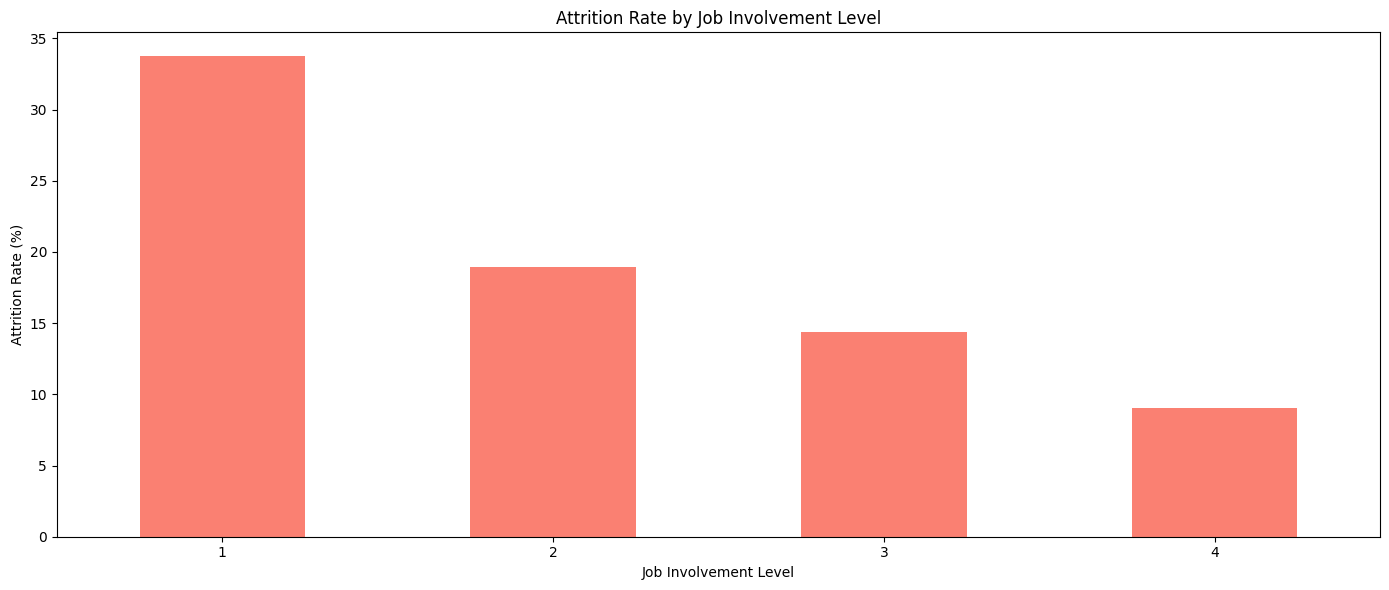

In [ ]:
# Visualization for JobInvolvement and Attrition

# Distribution
plt.figure(figsize=(14, 6))

# Attrition Rate
job_involvement_attrition_rate = data.groupby('JobInvolvement')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
job_involvement_attrition_rate.plot(kind='bar', color='salmon')
plt.title('Attrition Rate by Job Involvement Level')
plt.xlabel('Job Involvement Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


1. #### This plot displays the percentage of employees who left for each level of job involvement.
2. #### The attrition rate is distinctly higher for employees with the lowest job involvement. As involvement levels increase, the attrition rate decreases.

#### From the visualizations, it appears that employees with lower levels of job involvement, job satisfaction, and environment satisfaction are more likely to leave the company. This highlights the importance of ensuring that employees are engaged, satisfied, and find their work environment conducive.

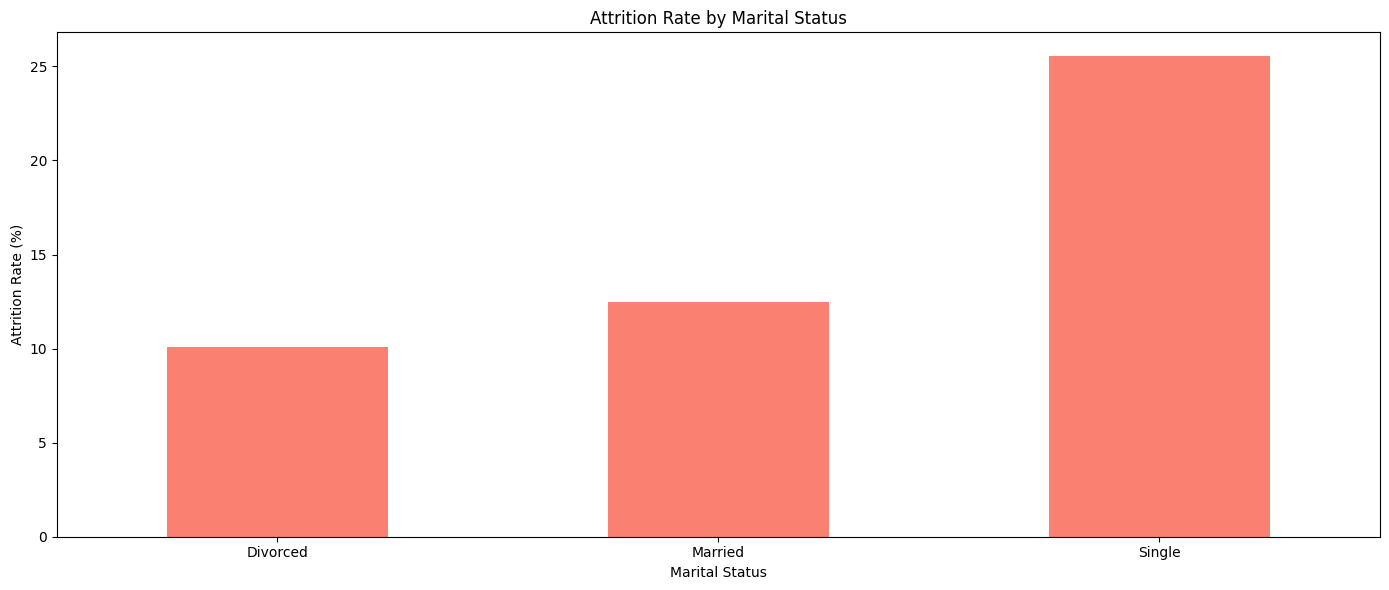

In [ ]:
# Visualization for MaritalStatus and Attrition

# Distribution
plt.figure(figsize=(14, 6))

# Attrition Rate
marital_status_attrition_rate = data.groupby('MaritalStatus')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
marital_status_attrition_rate.plot(kind='bar', color='salmon')
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### The attrition rate is notably higher for single employees, reaching almost 25%. In contrast, married and divorced employees have lower attrition rates, around 12% and 10% respectively.

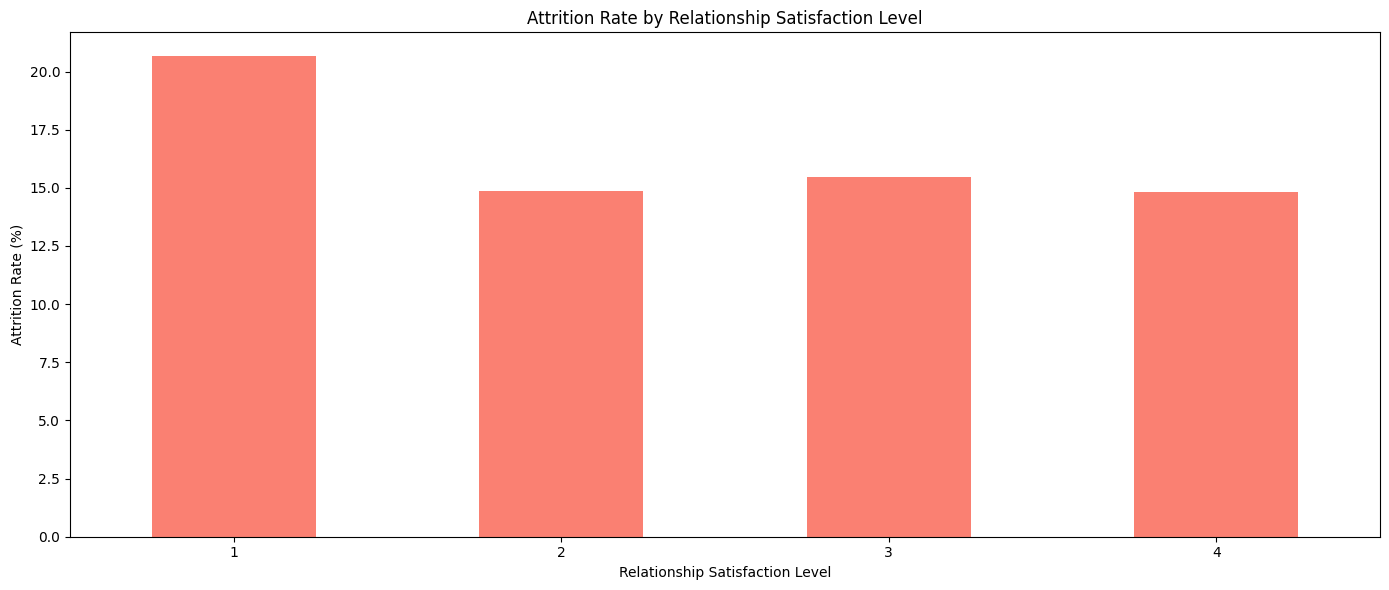

In [ ]:
# Visualization for RelationshipSatisfaction and Attrition

# Distribution
plt.figure(figsize=(14, 6))

# Attrition Rate
relationship_satisfaction_attrition_rate = data.groupby('RelationshipSatisfaction')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
relationship_satisfaction_attrition_rate.plot(kind='bar', color='salmon')
plt.title('Attrition Rate by Relationship Satisfaction Level')
plt.xlabel('Relationship Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### The attrition rates across different levels of relationship satisfaction are relatively close, with levels 1 and 3 having slightly higher attrition rates than levels 2 and 4.

#### This indicates that while relationship satisfaction does play a role in an employee's decision to leave it is not as influential as marital status

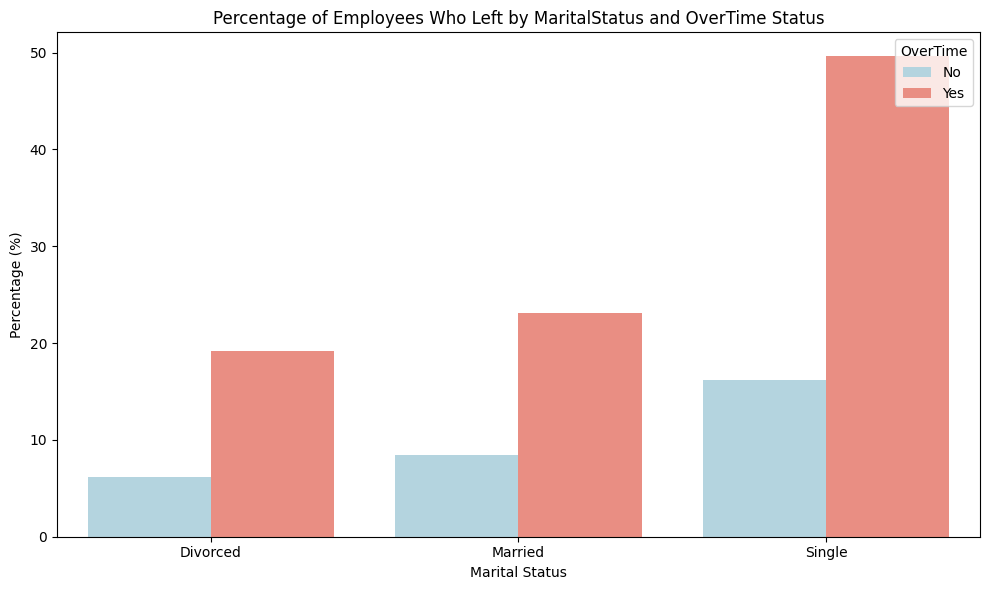

In [ ]:
# Convert Series to DataFrame
marital_overtime_attrition_percentages = data.groupby(['MaritalStatus', 'OverTime'])['Attrition'].value_counts(normalize=True).mul(100).unstack().fillna(0)['Yes']
marital_overtime_df = marital_overtime_attrition_percentages.reset_index()
marital_overtime_df.columns = ['MaritalStatus', 'OverTime', 'AttritionPercentage']

# Plotting the relative percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=marital_overtime_df, x='MaritalStatus', y='AttritionPercentage', hue='OverTime', palette={'No': 'lightblue', 'Yes': 'salmon'})
plt.title('Percentage of Employees Who Left by MaritalStatus and OverTime Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.legend(title='OverTime', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. #### Single Employees: Those who worked overtime exhibit a notably higher attrition rate compared to those who didn't.
2. #### Married Employees: Those who worked overtime also show an elevated attrition rate, but the difference between overtime and non-overtime is narrower than for single employees.
3. #### Divorced Employees: A similar pattern is observed, with those working overtime having a higher attrition rate. However, the overall attrition rates for divorced employees are lower than the other two categories.

#### Working overtime increases the likelihood of attrition across all marital statuses, but the effect is especially pronounced among single employees.

# Feature Selection

In [ ]:
import pandas as pd
# Load the dataset
file_path = 'HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Encoding categorical variables
le = LabelEncoder()
df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# Splitting the dataset
X = df_encoded.drop('Attrition', axis =1)
y = df_encoded['Attrition']

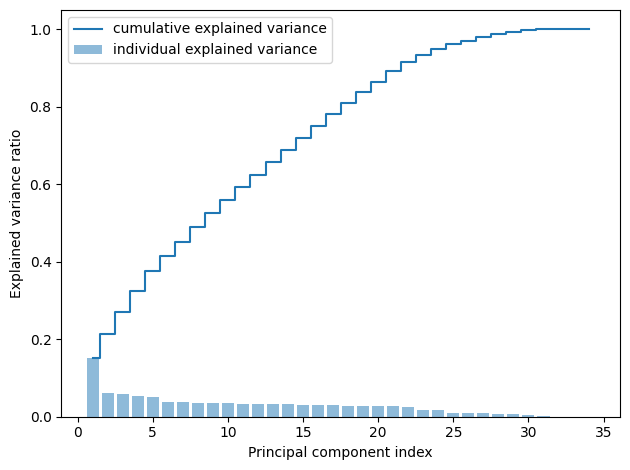

Most important features for the first principal component: [27 30 13 17 31 33 32  0  5 14 16 19 10 26  6 22 24  3 29 28 15 11  8 18
 21  4  1  2  9 12 23  7 20 25]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### About 90% of the variation in the data is captured by the first 23 components. For training the models it would be a good to measure the performance at different n_components.

# Model Selection

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the resampling strategy for imbalanced
over = SMOTE(sampling_strategy=0.85, random_state=32)
resample_pipeline = Pipeline([
    ('over', over)
])

# Apply the resampling pipeline
X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train_scaled, y_train)

### Since the model is heavily unbalanced we used SMOTE to counter this. SMOTE is a technique that generates synthetic data by interpolating between points to generate new data.

In [ ]:
y_train_resampled.value_counts()

0    865
1    735
Name: Attrition, dtype: int64

### In the following cell we tried different models at different PCA component levels and printed the metrics for each case.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'ANN': MLPClassifier(max_iter=1000, hidden_layer_sizes=(8,)),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier()
}

# Number of components to try
n_components_list = [13, 18, 23]


evaluation_results = {}

# for each n_components
for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_resampled)
    X_test_pca = pca.transform(X_test_scaled)

    # Store results
    evaluation_results[n_components] = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train_pca, y_train_resampled)

        # Predict on test data
        predictions = model.predict(X_test_pca)

        # Get probabilities for ROC AUC score
        probabilities = model.predict_proba(X_test_pca)[:, 1]

        # Calculate metrics
        roc_auc = roc_auc_score(y_test, probabilities)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)

        # Store the metrics for this model and n_components
        evaluation_results[n_components][name] = {
            'ROC AUC': roc_auc,
            'Accuracy': accuracy,
            'F1 Score': f1
        }

# Print the evaluation results
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(evaluation_results)

{13: {'ANN': {'Accuracy': 0.7709750566893424,
              'F1 Score': 0.41618497109826585,
              'ROC AUC': 0.7606089934484813},
      'Decision Tree': {'Accuracy': 0.6802721088435374,
                        'F1 Score': 0.26943005181347146,
                        'ROC AUC': 0.5503648004764741},
      'Gradient Boost': {'Accuracy': 0.7732426303854876,
                         'F1 Score': 0.39759036144578314,
                         'ROC AUC': 0.7480270994639667},
      'Logistic Regression': {'Accuracy': 0.7687074829931972,
                              'F1 Score': 0.46875,
                              'ROC AUC': 0.784060452650387},
      'Naive Bayes': {'Accuracy': 0.7664399092970522,
                      'F1 Score': 0.45502645502645506,
                      'ROC AUC': 0.7533874329958308},
      'Random Forest': {'Accuracy': 0.8163265306122449,
                        'F1 Score': 0.3816793893129771,
                        'ROC AUC': 0.7534432698034544}},
 18: {'ANN': {

### The F1 score was low. This can be attributed to the class imbalance. Though SMOTE was used on the training data it doesn't completely solve the problem

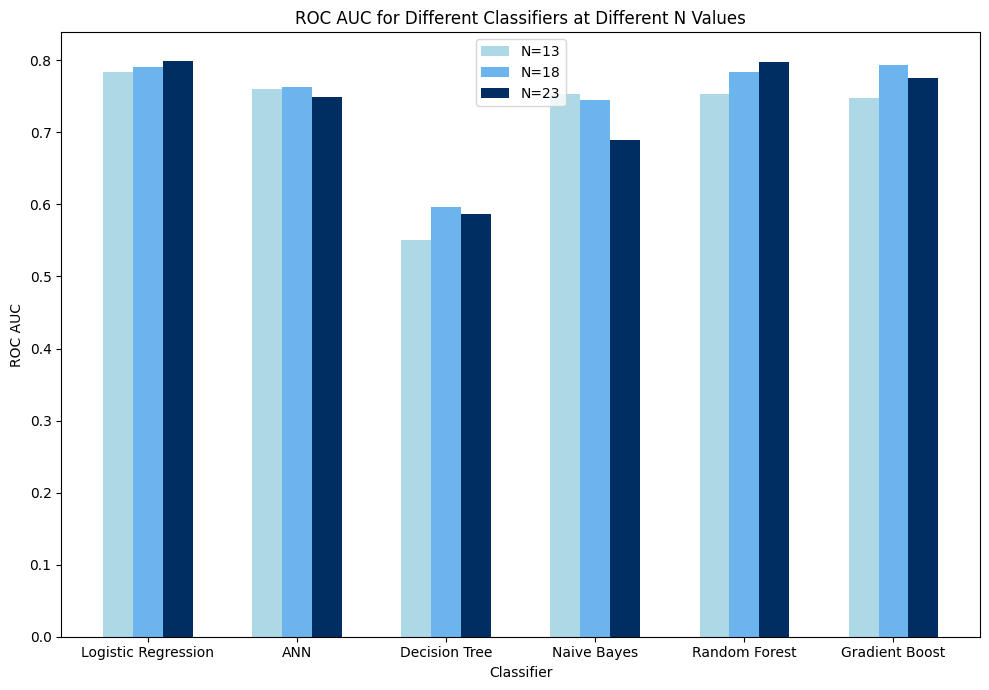

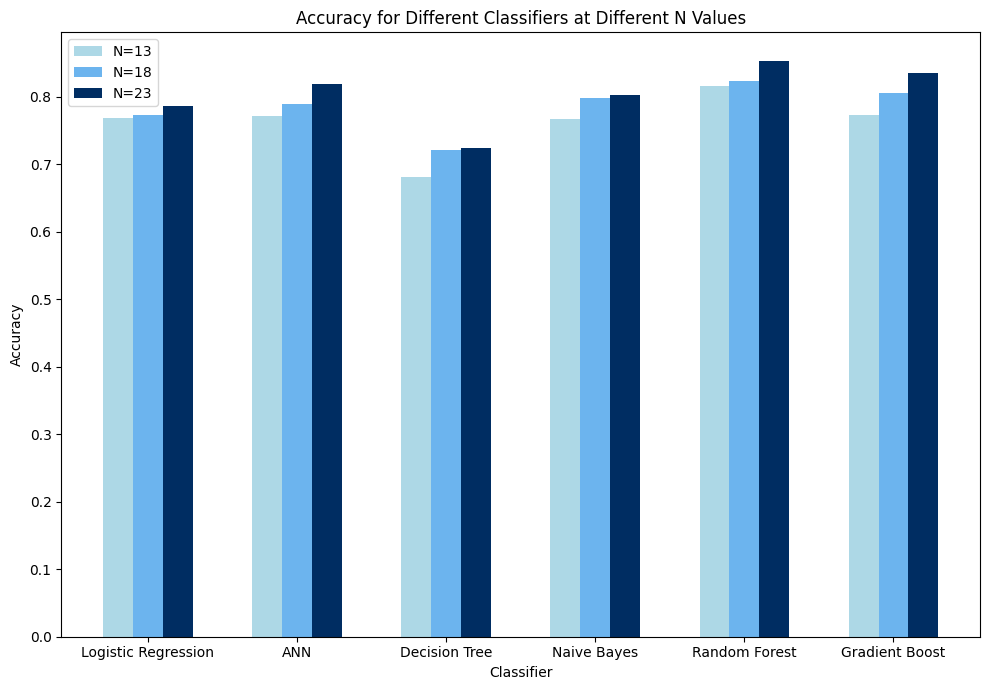

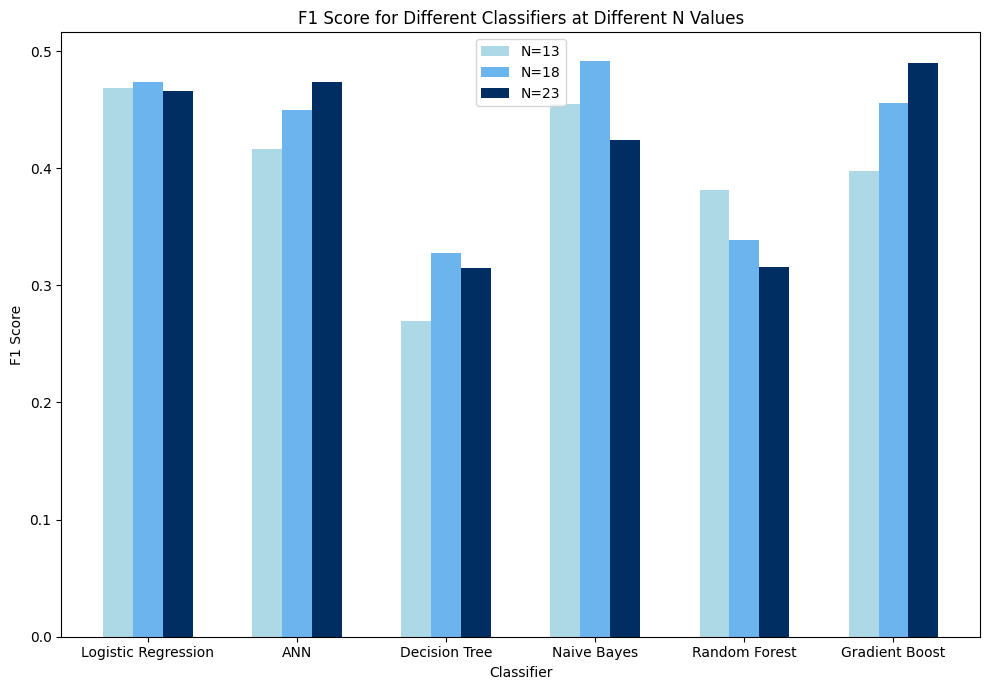

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['ROC AUC', 'Accuracy', 'F1 Score']
models = ['Logistic Regression', 'ANN', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'Gradient Boost']

# Number of groups
n_groups = len(models)

# We need to set the positions for group bars
index = np.arange(n_groups)
bar_width = 0.2


colors = ['#ADD8E6', '#6CB4EE', '#002D62']

# Create a bar chart for each metric
for metric_idx, metric in enumerate(metrics):
    plt.figure(figsize=(10, 7))

    for n_idx, (n_components, results) in enumerate(evaluation_results.items()):
        # Extract performance values for each model for this metric
        performance = [results[model][metric] for model in models]

        # Create a bar for each n_components
        plt.bar(index + bar_width * n_idx, performance, bar_width,
                color=colors[n_idx], label=f'N={n_components}')

    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Classifiers at Different N Values')
    plt.xticks(index + bar_width, models)
    plt.legend()

    plt.tight_layout()
    plt.show()